In [10]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
import numpy as np
import pandas as pd
import warnings
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.exceptions import ConvergenceWarning  # Importing ConvergenceWarning

In [11]:

# Load the CSV files
path_xbox = r"C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Player Stats\Cleaned Player Stats\Career Stats\Career_Stats_Xbox.csv"
path_ps4 = r"C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Player Stats\Cleaned Player Stats\Career Stats\Career_Stats_PS4.csv"
path_pc = r"C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Player Stats\Cleaned Player Stats\Career Stats\Career_Stats_PC.csv"

# Read the CSV files
df_xbox = pd.read_csv(path_xbox)
df_ps4 = pd.read_csv(path_ps4)
df_pc = pd.read_csv(path_pc)


In [12]:

# Combine the datasets
Career_Stats_df = pd.concat([df_xbox, df_ps4, df_pc], ignore_index=True)

# Convert the relevant columns to numeric
Career_Stats_df['career_kills'] = pd.to_numeric(Career_Stats_df['career_kills'], errors='coerce')
Career_Stats_df['career_wins'] = pd.to_numeric(Career_Stats_df['career_wins'], errors='coerce')
Career_Stats_df['career_revives'] = pd.to_numeric(Career_Stats_df['career_revives'], errors='coerce')

# Replace 0s with NaN to treat them as missing values
Career_Stats_df.replace(0, np.nan, inplace=True)

# Drop the player_name column for imputation
player_names = Career_Stats_df['player_name']
numeric_df = Career_Stats_df.drop(columns=['player_name'])


In [13]:

# Suppress iteration warnings for logistic regression convergence
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

print("Starting imputation processes...")

# Mode Imputation
print("Performing Mode Imputation...")
mode_imputer = SimpleImputer(strategy="most_frequent")
df_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_mode_imputed.insert(0, 'player_name', player_names)
print("Mode Imputation completed.")

# Logistic Regression Imputation
print("Performing Logistic Regression Imputation...")
lr_imputer = IterativeImputer(estimator=LogisticRegression(solver='lbfgs'), random_state=42, max_iter=10, verbose=2)
df_lr_imputed = pd.DataFrame(lr_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_lr_imputed.insert(0, 'player_name', player_names)
print("Logistic Regression Imputation completed.")

# Random Forest Imputation
print("Performing Random Forest Imputation...")
rf_imputer = IterativeImputer(estimator=RandomForestClassifier(n_estimators=10), random_state=42, max_iter=10, verbose=2)
df_rf_imputed = pd.DataFrame(rf_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_rf_imputed.insert(0, 'player_name', player_names)
print("Random Forest Imputation completed.")

# KNN Imputation
print("Performing KNN Imputation...")
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_knn_imputed.insert(0, 'player_name', player_names)
print("KNN Imputation completed.")

# Mean Imputation
print("Performing Mean Imputation...")
mean_imputer = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_mean_imputed.insert(0, 'player_name', player_names)
print("Mean Imputation completed.")

# Median Imputation
print("Performing Median Imputation...")
median_imputer = SimpleImputer(strategy='median')
df_median_imputed = pd.DataFrame(median_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_median_imputed.insert(0, 'player_name', player_names)
print("Median Imputation completed.")

# XGBoost Imputation
print("Performing XGBoost Imputation...")
xgb_imputer = IterativeImputer(estimator=XGBRegressor(), random_state=42, max_iter=10, verbose=2)
df_xgb_imputed = pd.DataFrame(xgb_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_xgb_imputed.insert(0, 'player_name', player_names)
print("XGBoost Imputation completed.")

# MICE Imputation
print("Performing MICE Imputation...")
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_mice_imputed.insert(0, 'player_name', player_names)
print("MICE Imputation completed.")

# Dictionary of imputed dataframes
imputed_dataframes = {
    "Mode Imputation": df_mode_imputed,
    "Logistic Regression Imputation": df_lr_imputed,
    "Random Forest Imputation": df_rf_imputed,
    "KNN Imputation": df_knn_imputed,
    "Mean Imputation": df_mean_imputed,
    "Median Imputation": df_median_imputed,
    "XGBoost Imputation": df_xgb_imputed,
    "MICE Imputation": df_mice_imputed
}

# Check that there are no missing values
print("\nVerifying no missing values after imputation:")
for name, df in imputed_dataframes.items():
    missing = df.isnull().sum().sum()
    print(f"{name}: {missing} missing values")

print("\nOriginal dataframe missing values (should be unchanged):")
print(Career_Stats_df.isnull().sum())


Starting imputation processes...
Performing Mode Imputation...
Mode Imputation completed.
Performing Logistic Regression Imputation...
[IterativeImputer] Completing matrix with shape (2901, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 23.79
[IterativeImputer] Change: 22860.99806581992, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 2/10, elapsed time 46.18
[IterativeImputer] Change: 23269.0, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 3/10, elapsed time 68.33
[IterativeImputer] Change: 32760.0, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 4/10, elapsed time 90.42
[IterativeImputer] Change: 53691.0, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 5/10, elapsed time 111.72
[IterativeImputer] Change: 69825.0, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 6/10, elapsed time 134.26
[IterativeImputer] Change: 120015.0, scaled tolerance: 384.461 
[Iterati

Original Data Correlation Heatmap and Scatter Plot:


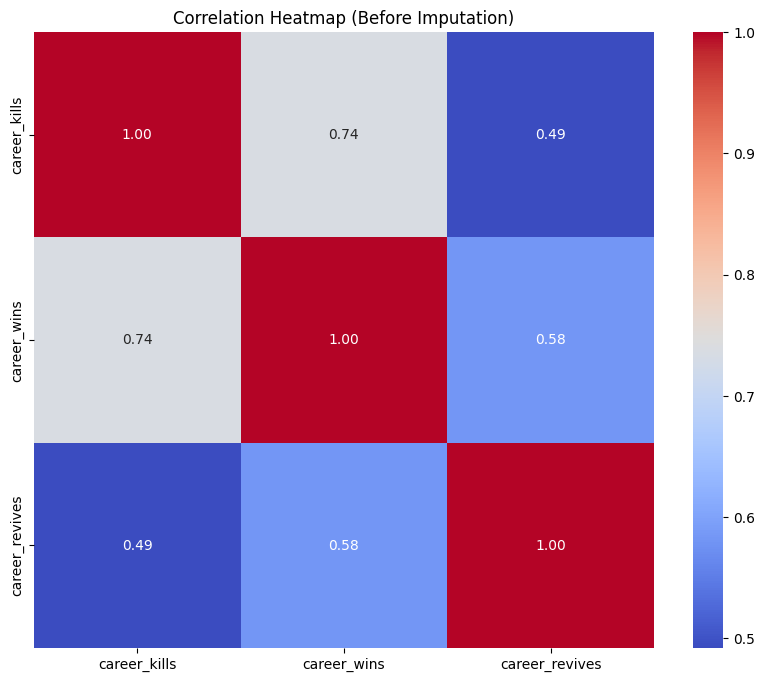

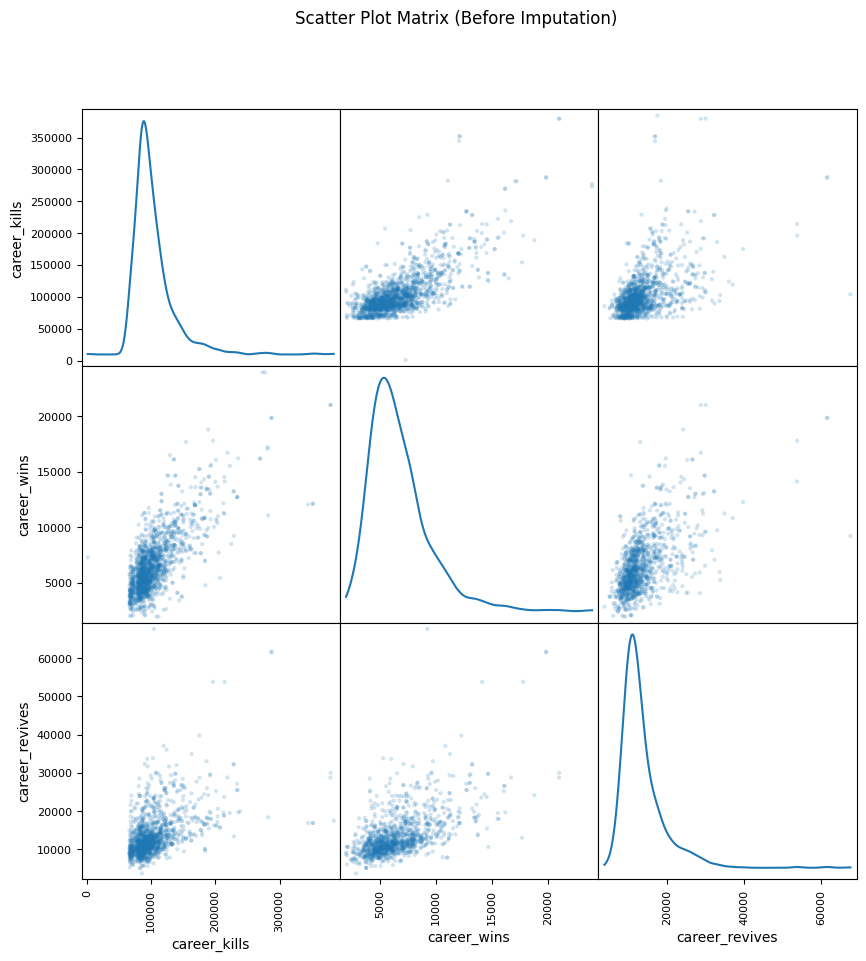


Mode Imputation Correlation Heatmap and Scatter Plot:


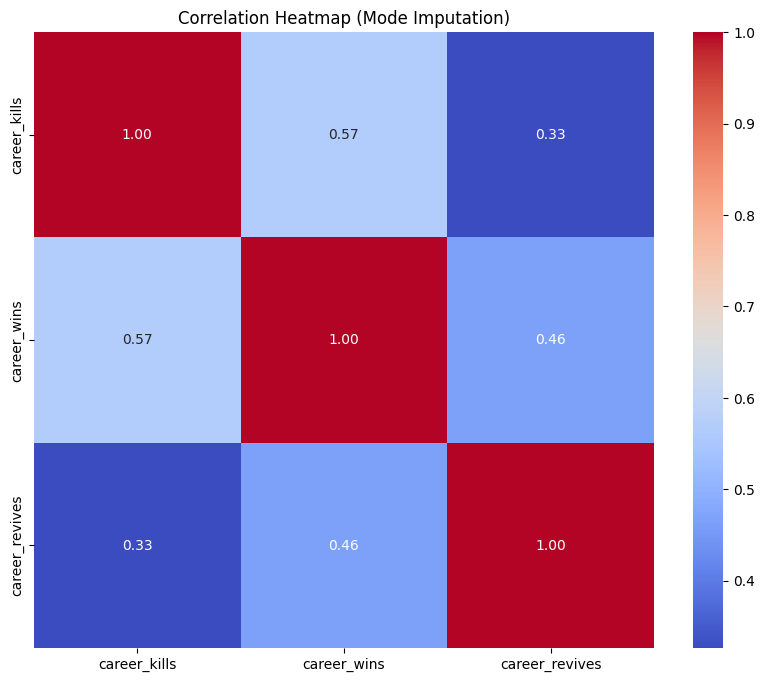

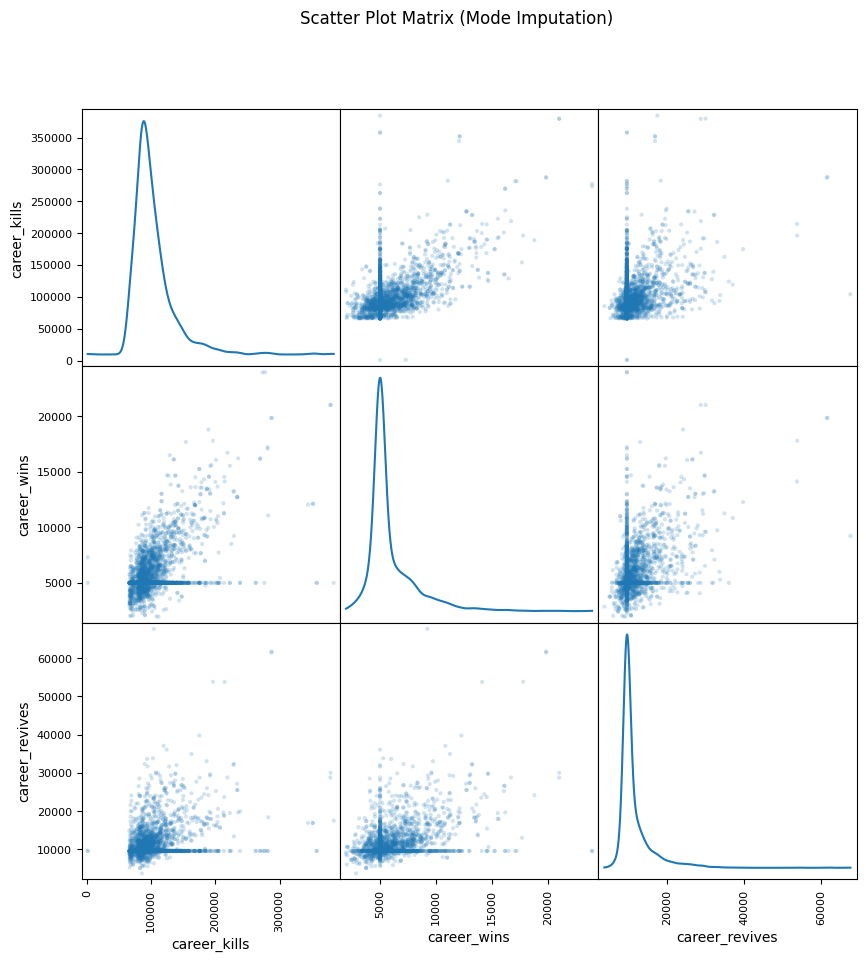


Logistic Regression Imputation Correlation Heatmap and Scatter Plot:


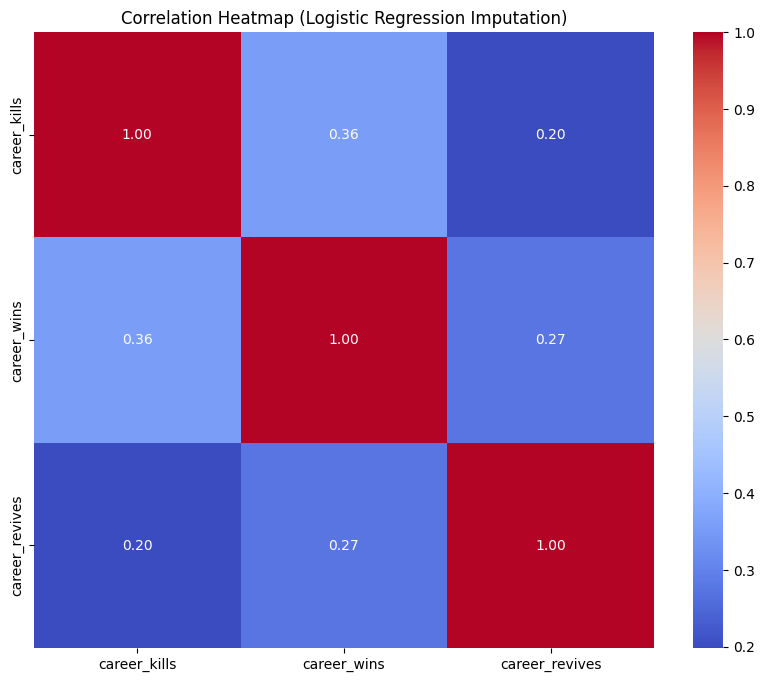

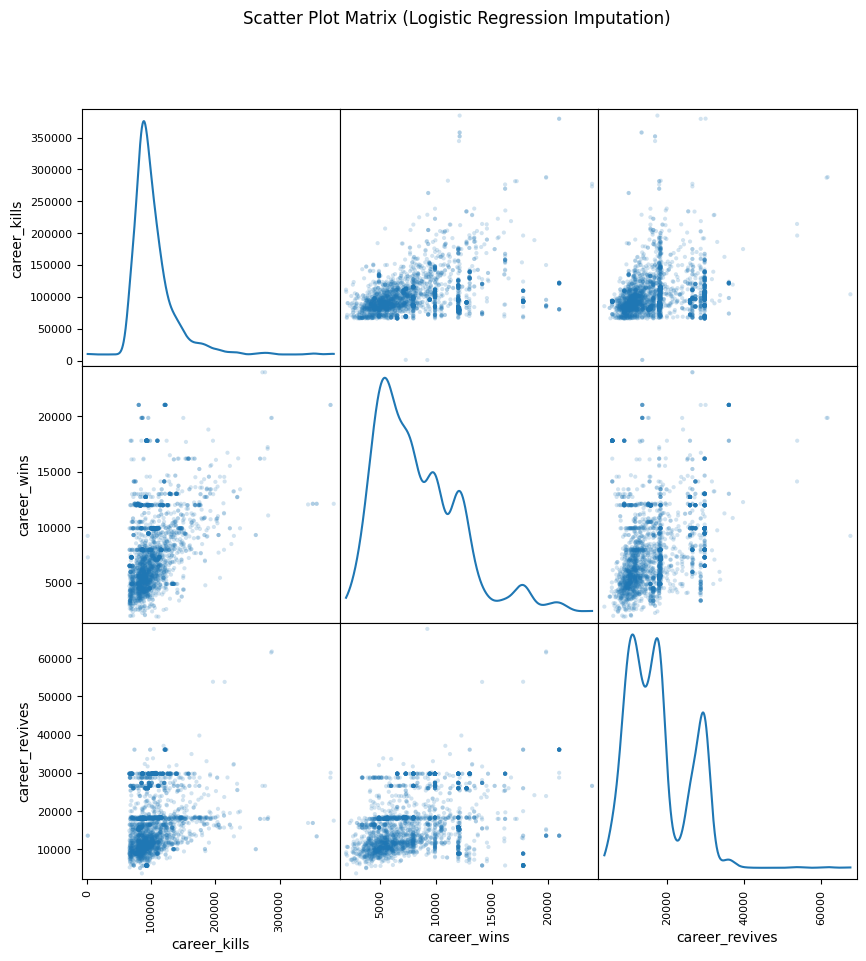


Random Forest Imputation Correlation Heatmap and Scatter Plot:


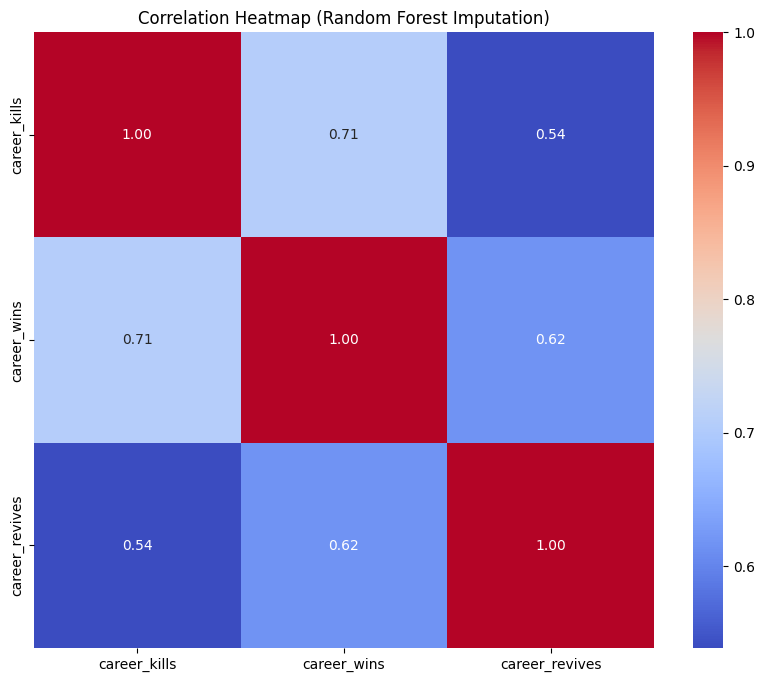

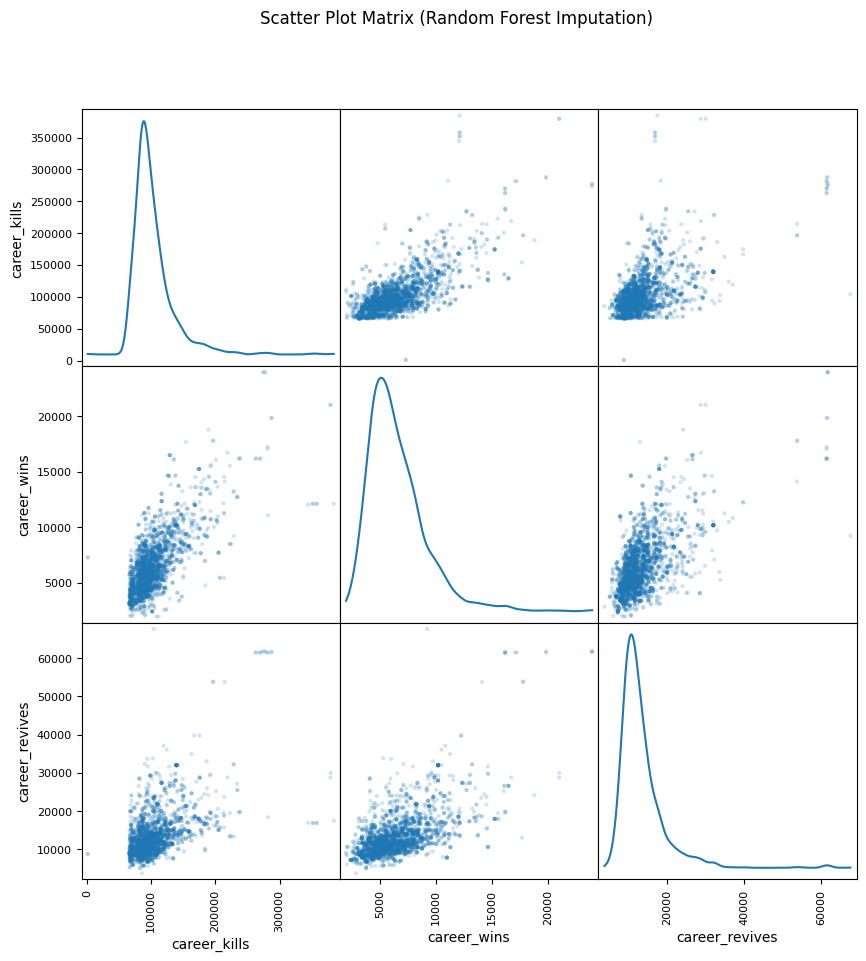


KNN Imputation Correlation Heatmap and Scatter Plot:


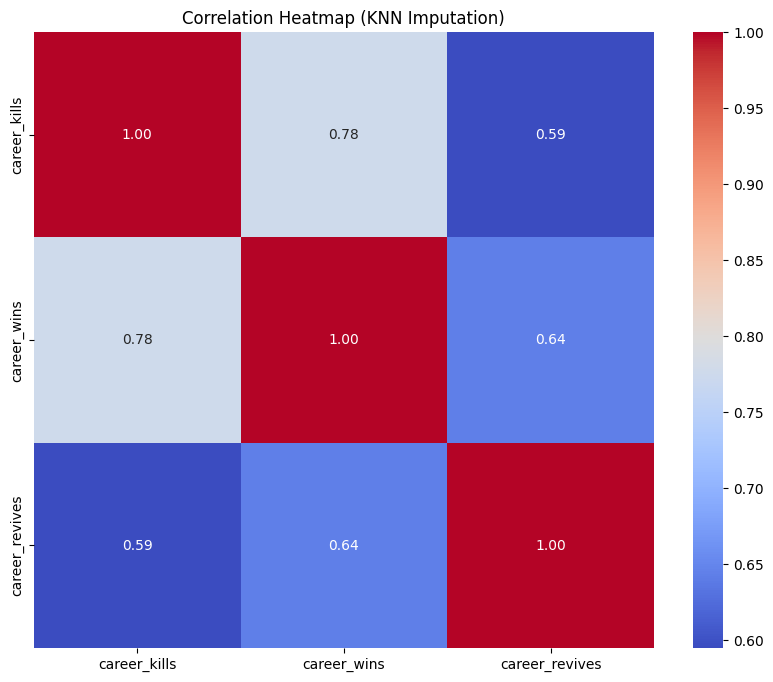

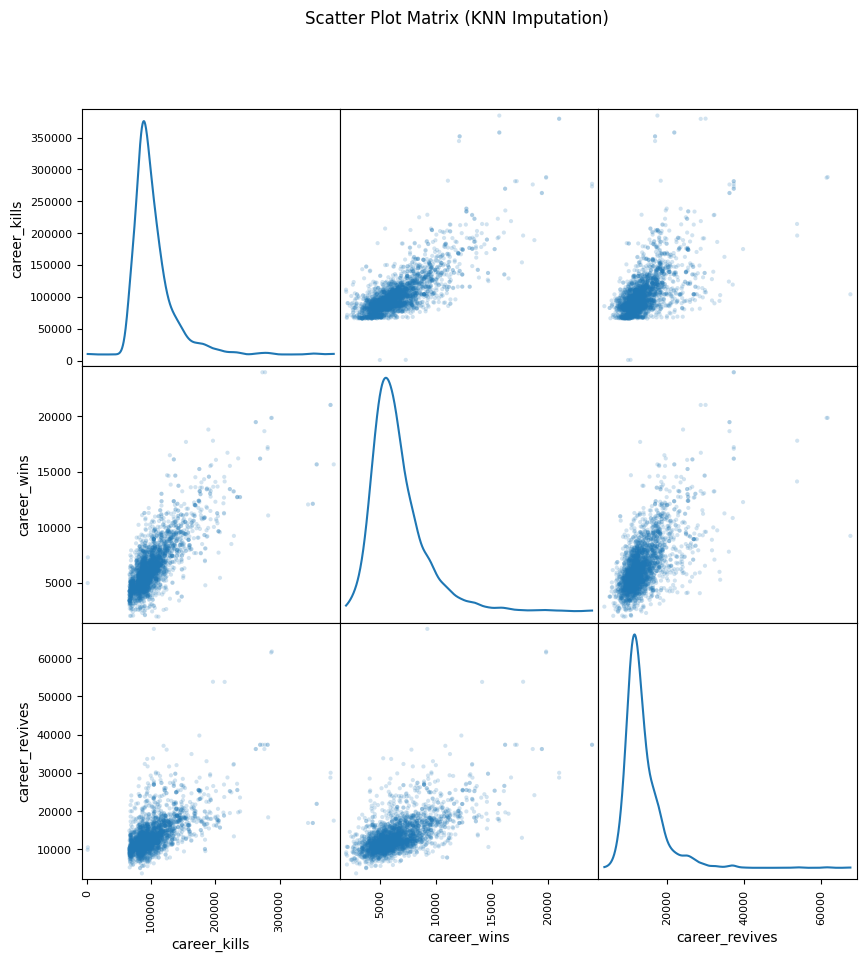


Mean Imputation Correlation Heatmap and Scatter Plot:


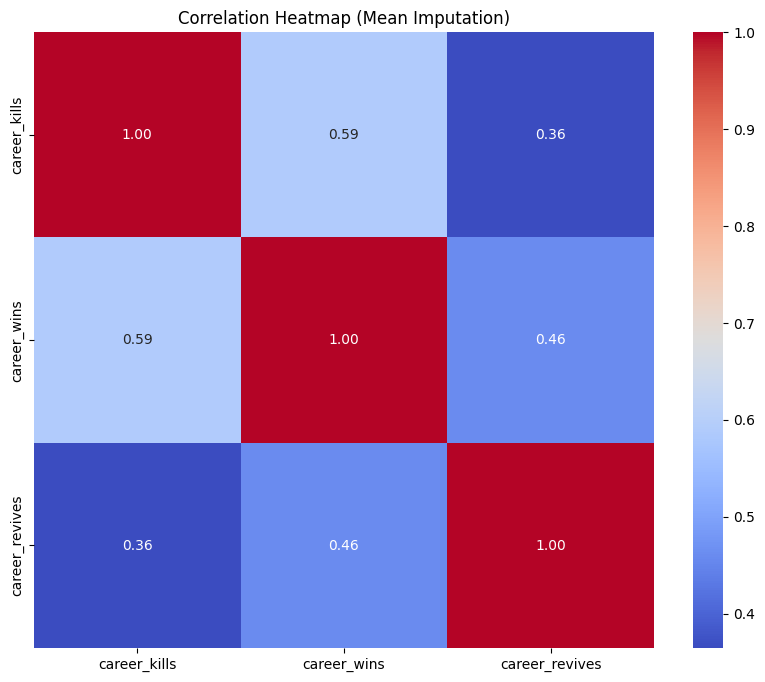

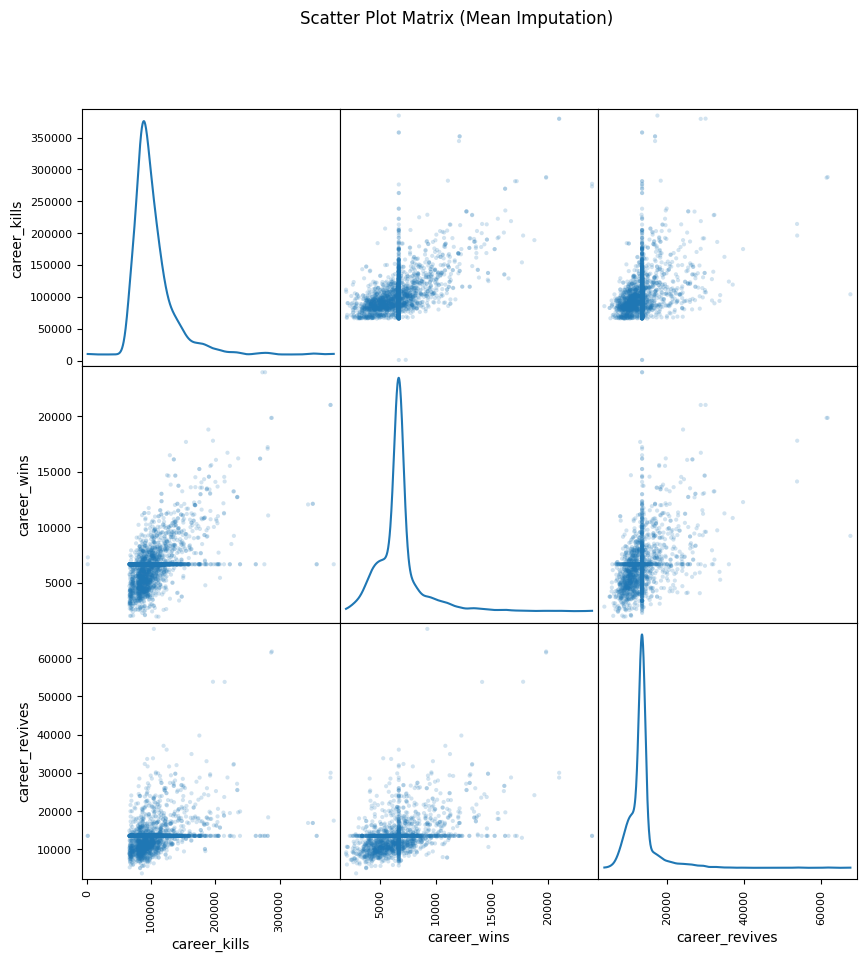


Median Imputation Correlation Heatmap and Scatter Plot:


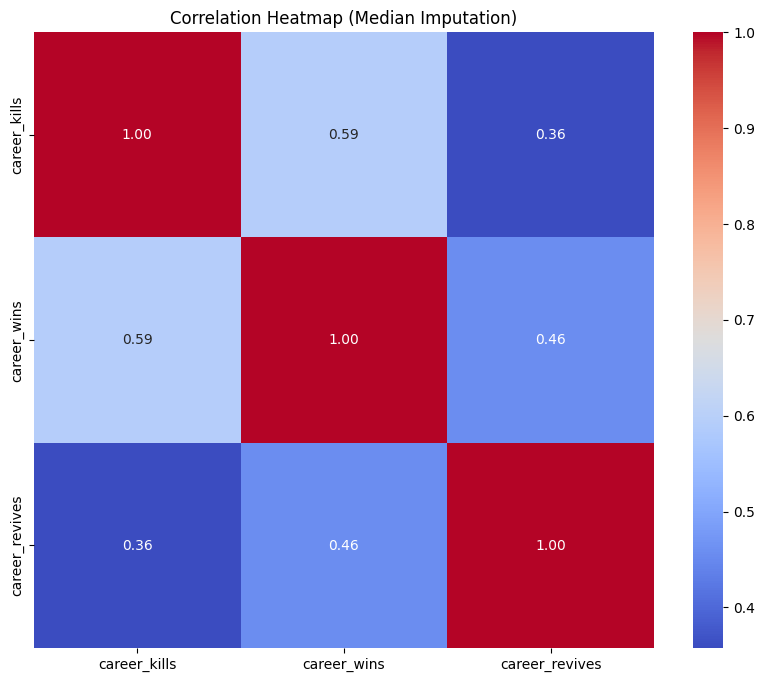

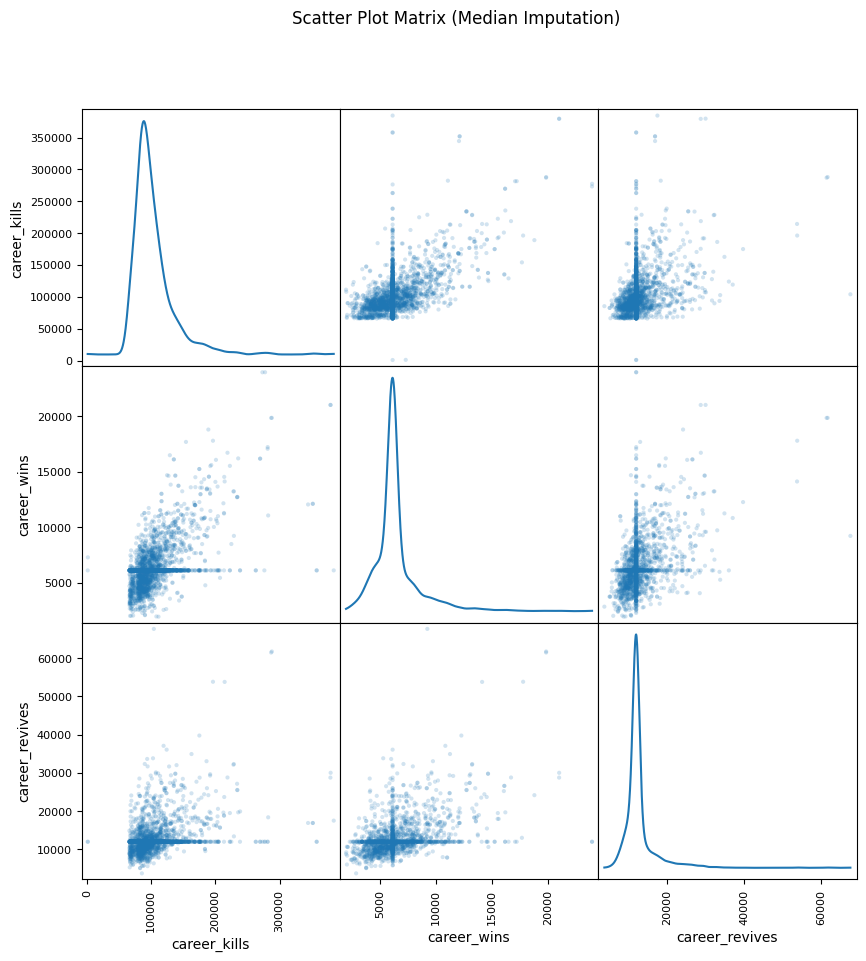


XGBoost Imputation Correlation Heatmap and Scatter Plot:


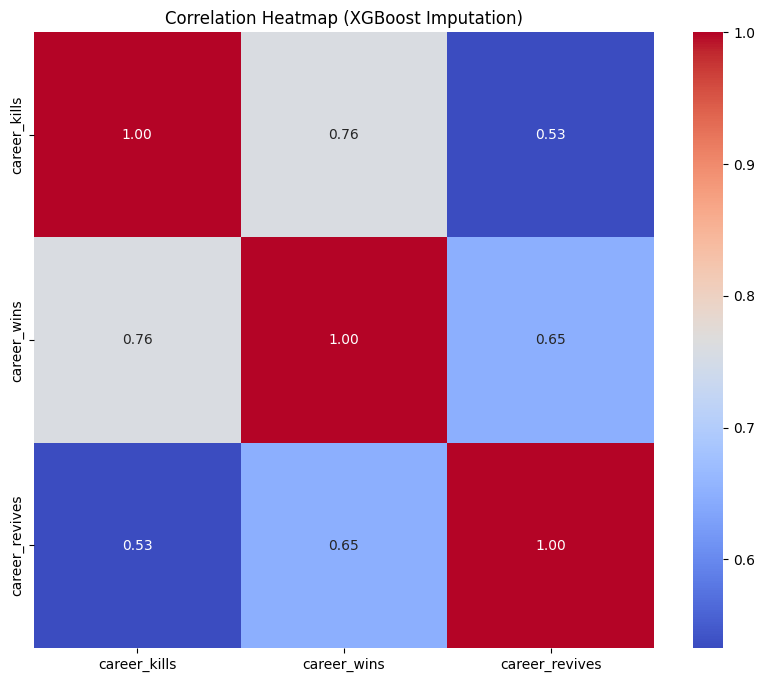

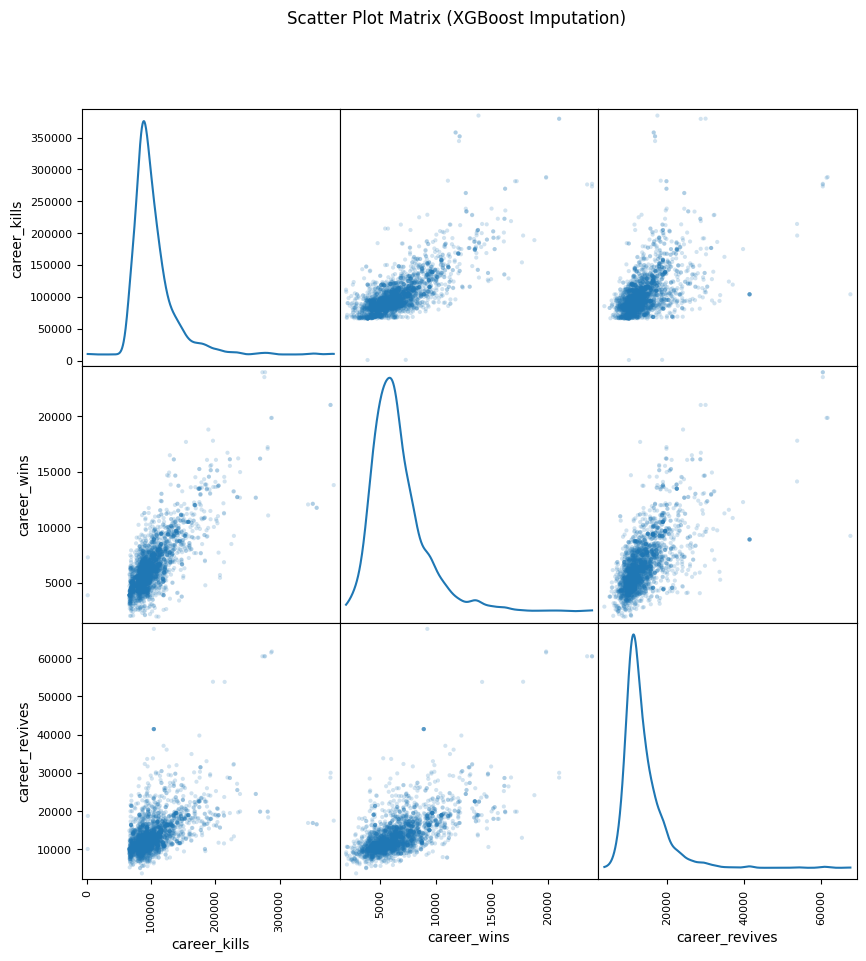


MICE Imputation Correlation Heatmap and Scatter Plot:


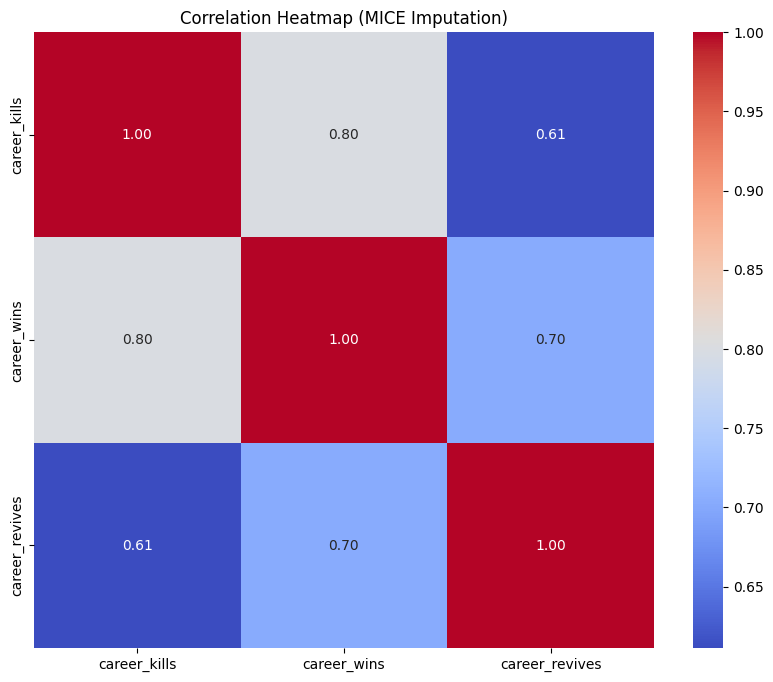

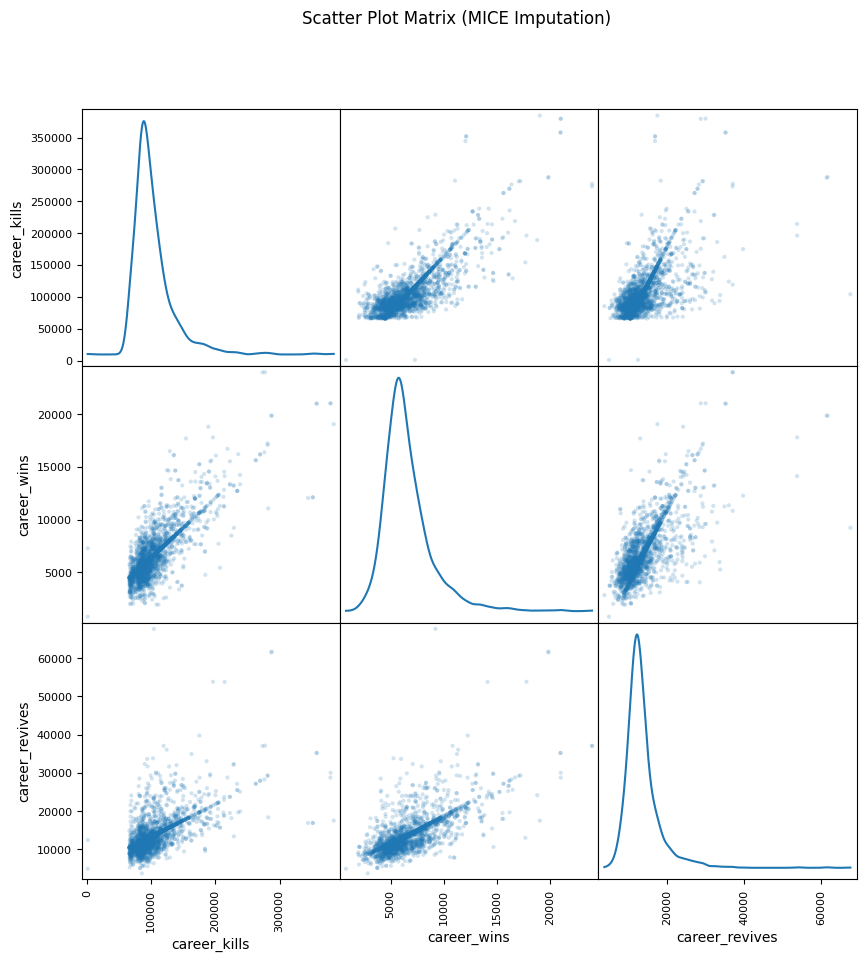

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the correlation heatmap
def plot_correlation_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
    plt.title(title)
    plt.show()

# Function to plot scatter matrix
def plot_scatter_matrix(df, title):
    pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
    plt.suptitle(title)
    plt.show()

# Plot correlation heatmap and scatter plot for original data
print("Original Data Correlation Heatmap and Scatter Plot:")
plot_correlation_heatmap(numeric_df, "Correlation Heatmap (Before Imputation)")
plot_scatter_matrix(numeric_df, "Scatter Plot Matrix (Before Imputation)")

# After Imputation: Visualizing the correlation for each imputed dataframe
for name, df in imputed_dataframes.items():
    print(f"\n{name} Correlation Heatmap and Scatter Plot:")
    
    # Drop 'player_name' for correlation matrix
    imputed_numeric_df = df.drop(columns=['player_name'])
    
    # Plot heatmap for the imputed data
    plot_correlation_heatmap(imputed_numeric_df, f"Correlation Heatmap ({name})")
    
    # Plot scatter plot for the imputed data
    plot_scatter_matrix(imputed_numeric_df, f"Scatter Plot Matrix ({name})")


In [16]:


# Round off the values in the MICE-imputed dataframe (excluding 'player_name')
df_mice_imputed_rounded = df_mice_imputed.copy()
df_mice_imputed_rounded.iloc[:, 1:] = df_mice_imputed_rounded.iloc[:, 1:].round()

# Define the file path where you want to save the MICE-imputed dataset
save_path = r"C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Career Stats Analysis\Total_Career_Stats.csv"

# Save the rounded MICE-imputed dataframe to the specified file path as a CSV
df_mice_imputed_rounded.to_csv(save_path, index=False)

print(f"Rounded MICE-imputed dataset saved to {save_path}")


Rounded MICE-imputed dataset saved to C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Career Stats Analysis\Total_Career_Stats.csv
